In [10]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import nltk
import spacy
import seaborn as sns

In [36]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [7]:
dataPath = '../../data/clean/'
#Load the data
female_characters = pd.read_csv(dataPath + 'female_character_description.txt', sep=',')
male_characters = pd.read_csv(dataPath + 'male_character_description.txt', sep=',')


In [57]:
female_character.head()

,Character Name,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_DOB_year,Character Type,word_count
0,Jen Yu,F,163.0,NaN,Zhang Ziyi,1979.0,arrogant kungfu guy,3
1,Margo Channing,F,160.0,NaN,Bette Davis,1908.0,prima donna,2
2,Laurie Strode,F,175.0,/m/048z7l,Jamie Lee Curtis,1958.0,final girl,2
3,Sidney Prescott,F,170.0,/m/092h2qt,Neve Campbell,1973.0,final girl,2
4,Susie Diamond,F,171.0,/m/065b6q,Michelle Pfeiffer,1958.0,chanteuse,1


In [58]:
### 

## Analyse the character description based on the gender

In [8]:
male_characters["word_count"].describe()

count    5534.000000
mean        2.344416
std         0.935044
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: word_count, dtype: float64

In [9]:
female_characters["word_count"].describe()

count    487.000000
mean       1.714579
std        0.474291
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: word_count, dtype: float64

Word count describes how many words are used to describe the character.

We can see that they are 11 more character types for men than women, showing that they are over represented in the film industry.

### Character descrption based on adjectives and verbs

In [24]:
# Load the pre-trained spaCy model
nlp = spacy.load('en_core_web_sm')

# Sample DataFrame
data_female = female_characters['Character Type']
data_male = male_characters['Character Type']


data_female = pd.DataFrame(data_female)
data_male = pd.DataFrame(data_male)

# Function to extract adjectives from a description
def extract_words(text, pos_type):
    doc = nlp(text)
    # Extract tokens that match the desired part of speech
    pos_tokens = [token.text.lower() for token in doc if token.pos_ == pos_type]
    return pos_tokens

# Apply the function to the 'Character Type' column for both adjectives and verbs
data_female['adjectives'] = data_female['Character Type'].apply(lambda x: extract_words(x, 'ADJ'))
data_female['verbs'] = data_female['Character Type'].apply(lambda x: extract_words(x, 'VERB'))

data_male['adjectives'] = data_male['Character Type'].apply(lambda x: extract_words(x, 'ADJ'))
data_male['verbs'] = data_male['Character Type'].apply(lambda x: extract_words(x, 'VERB'))

In [52]:
data_female['adjectives'].value_counts()


adjectives
[]                366
[dumb, blonde]     62
[final]            51
[arrogant]          5
[eccentric]         3
Name: count, dtype: int64

In [ ]:
data_female['verbs'].value_counts()

verbs
[]          434
[broken]     44
[klutz]       9
Name: count, dtype: int64

In [ ]:
data_male['adjectives'].value_counts()

adjectives
[]                      3189
[crazy, jealous]         398
[byronic]                290
[corrupt, corporate]     247
[dirty]                  144
[cultured]               104
[fastest]                101
[loveable]                96
[sargeant]                93
[egomaniac]               91
[romantic]                72
[professional]            66
[young]                   62
[arrogant]                58
[absent, minded]          56
[playful]                 56
[evil]                    53
[crazy]                   51
[soft]                    46
[eccentric]               46
[grumpy, old]             45
[stupid]                  43
[big]                     36
[dumb]                    34
[bromantic]               29
[bankrupt]                27
[dumb, blonde]             1
Name: count, dtype: int64

In [56]:
data_male['verbs'].value_counts()

verbs
[]              4967
[drill]           93
[hardboiled]      87
[retired]         81
[casanova]        69
[consummate]      66
[henpecked]       64
[turned]          53
[broken]          22
[made]            22
[klutz]           10
Name: count, dtype: int64

In [40]:
# Flatten the lists and combine all words into a single string
all_adjectives_female = ' '.join([word for sublist in data_female['adjectives'] for word in sublist])
all_verbs_female = ' '.join([word for sublist in data_female['verbs'] for word in sublist])

#because not many words are used, merge the adjectives and verbs
all_words_female = all_adjectives_female + all_verbs_female


In [46]:
all_adjectives_male = ' '.join([word for sublist in data_male['adjectives'] for word in sublist])
all_verbs_male = ' '.join([word for sublist in data_male['verbs'] for word in sublist])

#merge the adjectives and verbs
all_words_male = all_adjectives_male + all_verbs_male

In [42]:
face_men = np.array(Image.open("../../data/image/face_men.png"))
face_women = np.array(Image.open("../../data/image/face_women.png"))
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

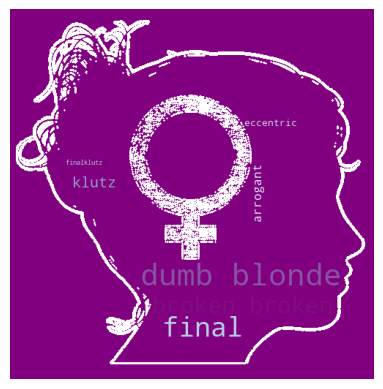

In [45]:
wc_female = WordCloud(background_color = 'purple', mask = face_women, contour_width = 2,
     contour_color = 'white', colormap = 'BuPu_r', width = 800, height = 500).generate(all_words_female)
plt.axis("off")
plt.imshow(wc_female)

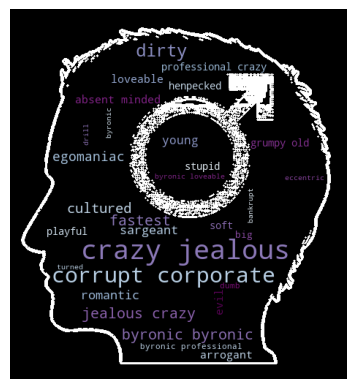

In [50]:
wc_male = WordCloud(background_color = 'black', mask = face_men, contour_width = 2,
     contour_color = 'white', colormap = 'BuPu_r', width = 800, height = 500, max_words=30).generate(all_words_male)
plt.axis("off")
plt.imshow(wc_male)

### Analysis

After having seen that fewer words are used to describe female character, the visualisation enables us to see that mainly negative words are used to describe them. The most common description for female character is dumb blond, which is quite reductive. The two only verbs use are klutz and broke.

Men in opposite show more complex description, showing more complex characters. The description belong to more diversed lexical fields than for women, going from romantic, through egomaniac to cultured. The concept of romantic is also declined by the used of the adjective bromantic.

Even quite non common word are used, like byronic, a Byronic hero is a fictional character who is a moody rebel, often haunted by a dark secret from his past. This shows that even with one word, we can learn a lot from a character.